In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import scipy.io as scio

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,RepeatVector,BatchNormalization,Activation,Conv1D,MaxPooling2D,UpSampling1D,Flatten,Conv2D,UpSampling2D,MaxPool1D,Flatten,LSTM
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import recall_score,classification_report,auc,roc_curve
from sklearn.metrics import precision_recall_fscore_support,f1_score

from numpy.random import seed
seed(1)
os.environ['PYTHONHASHSEED']=str(0)
SEED=2019
DATA_SPLIT_PCT=0.2

nb_epoch=200
batch_size=64
input_dim=152
encoding_dim=64
hidden_dim=int(encoding_dim/2)
learning_rate=1e-3

In [2]:
# Import pandas library
import pandas as pd
import numpy as np
# Read csv data file
# Data without feature standardization
df = pd.read_csv('Labelled50GapRandom_LabelScale.csv')
# View the number of rows and columns
df.head()
df.dtypes
df.shape

(2169, 153)

In [3]:
# Import LabelEncoder
from sklearn import preprocessing
# Create LabelEncoder
le = preprocessing.LabelEncoder()

In [4]:
# Indicate the target column
target = df['Label_mL']
# Indicate the columns that will serve as features
features = df.drop('Label_mL', axis = 1)

In [5]:
'''
features = df[[  'Signal012',
                'Signal013',
                'Signal112',
                'Signal711',
                'Signal712',
                'Signal713',
                'Signal714' ]]   
print(features.shape)
'''

"\nfeatures = df[[  'Signal012',\n                'Signal013',\n                'Signal112',\n                'Signal711',\n                'Signal712',\n                'Signal713',\n                'Signal714' ]]   \nprint(features.shape)\n"

In [6]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)
# Split the dataset into training set and development set
#x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.4, random_state = 10)
y_test_cate=to_categorical(y_test,num_classes=11)
y_train_cate=to_categorical(y_train,num_classes=11)
#数据标准化
scaler=StandardScaler().fit(x_train)
x_train_rescaled=scaler.transform(x_train)
x_test_rescaled=scaler.transform(x_test)
print(y_test.shape)

print(x_train_rescaled.shape)
x_train_rescaled=x_train_rescaled.reshape(1301,19,8)
x_test_rescaled=x_test_rescaled.reshape(868,19,8)

(868,)
(1301, 152)


In [7]:
PRE=[]
TRUE=[]
ACC=[]
for i in range(10):
#autoencoder
    input_img=Input(shape=(19,8))

    x=LSTM(32,activation='elu')(input_img)

    x=Dense(16,activation='elu')(x)

    LR=Dense(11,activation="softmax",name='LR')(x)
    
    model=Model(inputs=input_img,outputs=LR)

    # Training
# 选择评价函数，选择优化器，指定损失函数
    model.compile(metrics=['accuracy'],
                        loss= ['categorical_crossentropy'],
                        optimizer=Adam(lr=learning_rate))

    cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                        save_best_only=True,
                        monitor='val_LR_accuracy',
                        verbose = 0)

    tb = TensorBoard(log_dir='./logs',
                    histogram_freq=0,
                    write_graph=True,
                    write_images=True)

    history = model.fit(x_train_rescaled,y_train_cate,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test_rescaled, y_test_cate),
                          verbose=1).history
    acc=model.evaluate(x_test_rescaled,y_test_cate)
    pre=model.predict(x_test_rescaled)
    y_pred=np.argmax(pre,axis=1)
    PRE.append(y_pred)
    TRUE.append(y_test)
    ACC.append(acc[1])
print(np.mean(ACC),np.std(ACC))


Epoch 1/200


C:\Users\bhuah\.conda\envs\BHEvir\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 2s 30ms/step - loss: 2.3098 - accuracy: 0.2145 - val_loss: 2.1307 - val_accuracy: 0.4032
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 1.9508 - accuracy: 0.4504 - val_loss: 1.6832 - val_accuracy: 0.4839
Epoch 3/200
21/21 [==============================] - 0s 8ms/step - loss: 1.5592 - accuracy: 0.5073 - val_loss: 1.3296 - val_accuracy: 0.5714
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 1.2701 - accuracy: 0.5926 - val_loss: 1.1039 - val_accuracy: 0.6048
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 0.9928 - accuracy: 0.6672 - val_loss: 0.8693 - val_accuracy: 0.7154
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 0.7309 - accuracy: 0.7794 - val_loss: 0.6615 - val_accuracy: 0.8618
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 0.5532 - accuracy: 0.8593 - val_loss: 0.5421 - val_accuracy: 0.8871
Epoch 8/200
21/21 [=====

Epoch 59/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0805 - accuracy: 0.9839 - val_loss: 0.0697 - val_accuracy: 0.9839
Epoch 60/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0725 - accuracy: 0.9892 - val_loss: 0.0601 - val_accuracy: 0.9873
Epoch 61/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0853 - accuracy: 0.9877 - val_loss: 0.0494 - val_accuracy: 0.9896
Epoch 62/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0619 - accuracy: 0.9885 - val_loss: 0.0493 - val_accuracy: 0.9873
Epoch 63/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0551 - accuracy: 0.9892 - val_loss: 0.0489 - val_accuracy: 0.9896
Epoch 64/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0493 - accuracy: 0.9908 - val_loss: 0.0480 - val_accuracy: 0.9896
Epoch 65/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0479 - accuracy: 0.9908 - val_loss: 0.0470 - val_accuracy: 0.9896

21/21 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9942
Epoch 117/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9942
Epoch 118/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9954
Epoch 119/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9919
Epoch 120/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9942
Epoch 121/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0794 - accuracy: 0.9739 - val_loss: 0.3169 - val_accuracy: 0.8963
Epoch 122/200
21/21 [==============================] - 0s 12ms/step - loss: 0.2137 - accuracy: 0.9301 - val_loss: 0.1039 - val_accuracy: 0.9758
Epoch 

Epoch 173/200
21/21 [==============================] - 0s 11ms/step - loss: 7.8846e-04 - accuracy: 1.0000 - val_loss: 0.5152 - val_accuracy: 0.9931
Epoch 174/200
21/21 [==============================] - 0s 12ms/step - loss: 7.6435e-04 - accuracy: 1.0000 - val_loss: 0.5263 - val_accuracy: 0.9931
Epoch 175/200
21/21 [==============================] - 0s 11ms/step - loss: 7.4983e-04 - accuracy: 1.0000 - val_loss: 0.5145 - val_accuracy: 0.9931
Epoch 176/200
21/21 [==============================] - 0s 11ms/step - loss: 7.0454e-04 - accuracy: 1.0000 - val_loss: 0.5108 - val_accuracy: 0.9931
Epoch 177/200
21/21 [==============================] - 0s 12ms/step - loss: 6.8532e-04 - accuracy: 1.0000 - val_loss: 0.5199 - val_accuracy: 0.9931
Epoch 178/200
21/21 [==============================] - 0s 12ms/step - loss: 6.6269e-04 - accuracy: 1.0000 - val_loss: 0.5395 - val_accuracy: 0.9931
Epoch 179/200
21/21 [==============================] - 0s 12ms/step - loss: 6.4969e-04 - accuracy: 1.0000 - val_

Epoch 29/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0802 - accuracy: 0.9839 - val_loss: 0.1045 - val_accuracy: 0.9724
Epoch 30/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0616 - accuracy: 0.9839 - val_loss: 0.0970 - val_accuracy: 0.9827
Epoch 31/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0586 - accuracy: 0.9831 - val_loss: 0.1426 - val_accuracy: 0.9700
Epoch 32/200
21/21 [==============================] - 0s 9ms/step - loss: 0.3300 - accuracy: 0.9093 - val_loss: 0.1880 - val_accuracy: 0.9459
Epoch 33/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1327 - accuracy: 0.9646 - val_loss: 0.1173 - val_accuracy: 0.9700
Epoch 34/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0946 - accuracy: 0.9731 - val_loss: 0.0973 - val_accuracy: 0.9735
Epoch 35/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0742 - accuracy: 0.9816 - val_loss: 0.0727 - val_accuracy: 0.9827


21/21 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 0.9908 - val_loss: 0.1405 - val_accuracy: 0.9781
Epoch 87/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.1392 - val_accuracy: 0.9873
Epoch 88/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0109 - accuracy: 0.9985 - val_loss: 0.1283 - val_accuracy: 0.9896
Epoch 89/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.1520 - val_accuracy: 0.9896
Epoch 90/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.1303 - val_accuracy: 0.9931
Epoch 91/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.1641 - val_accuracy: 0.9908
Epoch 92/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0055 - accuracy: 0.9977 - val_loss: 0.1449 - val_accuracy: 0.9896
Epoch 93/200

21/21 [==============================] - 0s 12ms/step - loss: 1.7475e-04 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9942
Epoch 143/200
21/21 [==============================] - 0s 12ms/step - loss: 1.6918e-04 - accuracy: 1.0000 - val_loss: 0.2072 - val_accuracy: 0.9942
Epoch 144/200
21/21 [==============================] - 0s 11ms/step - loss: 1.6849e-04 - accuracy: 1.0000 - val_loss: 0.2084 - val_accuracy: 0.9942
Epoch 145/200
21/21 [==============================] - 0s 11ms/step - loss: 1.6350e-04 - accuracy: 1.0000 - val_loss: 0.2096 - val_accuracy: 0.9931
Epoch 146/200
21/21 [==============================] - 0s 10ms/step - loss: 1.5225e-04 - accuracy: 1.0000 - val_loss: 0.2094 - val_accuracy: 0.9942
Epoch 147/200
21/21 [==============================] - 0s 10ms/step - loss: 1.4368e-04 - accuracy: 1.0000 - val_loss: 0.2115 - val_accuracy: 0.9931
Epoch 148/200
21/21 [==============================] - 0s 10ms/step - loss: 1.4168e-04 - accuracy: 1.0000 - val_loss: 0.2124 -

21/21 [==============================] - 0s 11ms/step - loss: 3.6533e-05 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9919
Epoch 198/200
21/21 [==============================] - 0s 12ms/step - loss: 3.5707e-05 - accuracy: 1.0000 - val_loss: 0.2533 - val_accuracy: 0.9919
Epoch 199/200
21/21 [==============================] - 0s 12ms/step - loss: 3.4625e-05 - accuracy: 1.0000 - val_loss: 0.2547 - val_accuracy: 0.9919
Epoch 200/200
28/28 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.9919
Epoch 1/200
21/21 [==============================] - 2s 29ms/step - loss: 2.2627 - accuracy: 0.2613 - val_loss: 2.0967 - val_accuracy: 0.3249
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 1.9166 - accuracy: 0.3613 - val_loss: 1.6913 - val_accuracy: 0.3836
Epoch 3/200
21/21 [==============================] - 0s 10ms/step - loss: 1.7024 - accuracy: 0.4696 - val_loss: 1.2917 - val_accuracy: 0.6037
Epoch 4/200
21/21 [========================

Epoch 54/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0298 - accuracy: 0.9931 - val_loss: 0.0426 - val_accuracy: 0.9908
Epoch 55/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0290 - accuracy: 0.9923 - val_loss: 0.0415 - val_accuracy: 0.9908
Epoch 56/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0267 - accuracy: 0.9939 - val_loss: 0.0412 - val_accuracy: 0.9908
Epoch 57/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 0.9954 - val_loss: 0.0416 - val_accuracy: 0.9908
Epoch 58/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0243 - accuracy: 0.9954 - val_loss: 0.0414 - val_accuracy: 0.9908
Epoch 59/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0228 - accuracy: 0.9954 - val_loss: 0.0412 - val_accuracy: 0.9908
Epoch 60/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0217 - accuracy: 0.9954 - val_loss: 0.0409 - val_accuracy: 0.9908

21/21 [==============================] - 0s 13ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0248 - val_accuracy: 0.9931
Epoch 112/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0243 - val_accuracy: 0.9931
Epoch 113/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0248 - val_accuracy: 0.9931
Epoch 114/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9931
Epoch 115/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9931
Epoch 116/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9931
Epoch 117/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9931
Epoch 

21/21 [==============================] - 0s 10ms/step - loss: 4.3283e-04 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9954
Epoch 168/200
21/21 [==============================] - 0s 10ms/step - loss: 4.2989e-04 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9954
Epoch 169/200
21/21 [==============================] - 0s 10ms/step - loss: 4.0024e-04 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9954
Epoch 170/200
21/21 [==============================] - 0s 10ms/step - loss: 3.9089e-04 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9954
Epoch 171/200
21/21 [==============================] - 0s 10ms/step - loss: 3.7165e-04 - accuracy: 1.0000 - val_loss: 0.0315 - val_accuracy: 0.9954
Epoch 172/200
21/21 [==============================] - 0s 10ms/step - loss: 3.6511e-04 - accuracy: 1.0000 - val_loss: 0.0317 - val_accuracy: 0.9954
Epoch 173/200
21/21 [==============================] - 0s 10ms/step - loss: 3.5502e-04 - accuracy: 1.0000 - val_loss: 0.0318 -

Epoch 23/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0740 - accuracy: 0.9785 - val_loss: 0.3296 - val_accuracy: 0.9700
Epoch 24/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0678 - accuracy: 0.9823 - val_loss: 0.4166 - val_accuracy: 0.9666
Epoch 25/200
21/21 [==============================] - 0s 10ms/step - loss: 0.1773 - accuracy: 0.9585 - val_loss: 0.1776 - val_accuracy: 0.9574
Epoch 26/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1000 - accuracy: 0.9716 - val_loss: 0.1457 - val_accuracy: 0.9816
Epoch 27/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0768 - accuracy: 0.9816 - val_loss: 0.1750 - val_accuracy: 0.9804
Epoch 28/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0610 - accuracy: 0.9869 - val_loss: 0.2043 - val_accuracy: 0.9862
Epoch 29/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0492 - accuracy: 0.9877 - val_loss: 0.2399 - val_accuracy: 0.9850

21/21 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.2804 - val_accuracy: 0.9931
Epoch 81/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 0.9896
Epoch 82/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 0.2670 - val_accuracy: 0.9931
Epoch 83/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.3065 - val_accuracy: 0.9931
Epoch 84/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2944 - val_accuracy: 0.9931
Epoch 85/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3092 - val_accuracy: 0.9931
Epoch 86/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3075 - val_accuracy: 0.9931
Epoch 87/200

21/21 [==============================] - 0s 11ms/step - loss: 1.4263e-04 - accuracy: 1.0000 - val_loss: 0.1969 - val_accuracy: 0.9873
Epoch 137/200
21/21 [==============================] - 0s 10ms/step - loss: 1.3637e-04 - accuracy: 1.0000 - val_loss: 0.1940 - val_accuracy: 0.9873
Epoch 138/200
21/21 [==============================] - 0s 12ms/step - loss: 1.3211e-04 - accuracy: 1.0000 - val_loss: 0.1857 - val_accuracy: 0.9873
Epoch 139/200
21/21 [==============================] - 0s 11ms/step - loss: 1.2940e-04 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 0.9873
Epoch 140/200
21/21 [==============================] - 0s 12ms/step - loss: 1.2302e-04 - accuracy: 1.0000 - val_loss: 0.1861 - val_accuracy: 0.9873
Epoch 141/200
21/21 [==============================] - 0s 14ms/step - loss: 1.1985e-04 - accuracy: 1.0000 - val_loss: 0.1759 - val_accuracy: 0.9873
Epoch 142/200
21/21 [==============================] - 0s 11ms/step - loss: 1.1560e-04 - accuracy: 1.0000 - val_loss: 0.1742 -

21/21 [==============================] - 0s 11ms/step - loss: 3.1380e-05 - accuracy: 1.0000 - val_loss: 0.2575 - val_accuracy: 0.9873
Epoch 192/200
21/21 [==============================] - 0s 11ms/step - loss: 3.0844e-05 - accuracy: 1.0000 - val_loss: 0.2578 - val_accuracy: 0.9873
Epoch 193/200
21/21 [==============================] - 0s 12ms/step - loss: 3.0192e-05 - accuracy: 1.0000 - val_loss: 0.2584 - val_accuracy: 0.9873
Epoch 194/200
21/21 [==============================] - 0s 11ms/step - loss: 2.9534e-05 - accuracy: 1.0000 - val_loss: 0.2600 - val_accuracy: 0.9873
Epoch 195/200
21/21 [==============================] - 0s 11ms/step - loss: 2.8815e-05 - accuracy: 1.0000 - val_loss: 0.2600 - val_accuracy: 0.9873
Epoch 196/200
21/21 [==============================] - 0s 10ms/step - loss: 2.8419e-05 - accuracy: 1.0000 - val_loss: 0.2627 - val_accuracy: 0.9873
Epoch 197/200
21/21 [==============================] - 0s 10ms/step - loss: 2.7675e-05 - accuracy: 1.0000 - val_loss: 0.2631 -

21/21 [==============================] - 0s 10ms/step - loss: 0.0182 - accuracy: 0.9946 - val_loss: 0.0872 - val_accuracy: 0.9677
Epoch 48/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.0951 - val_accuracy: 0.9873
Epoch 49/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.0662 - val_accuracy: 0.9873
Epoch 50/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0125 - accuracy: 0.9977 - val_loss: 0.1091 - val_accuracy: 0.9873
Epoch 51/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.1019 - val_accuracy: 0.9873
Epoch 52/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.1279 - val_accuracy: 0.9885
Epoch 53/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.1301 - val_accuracy: 0.9885
Epoch 54/200

21/21 [==============================] - 0s 12ms/step - loss: 5.4009e-04 - accuracy: 1.0000 - val_loss: 0.2188 - val_accuracy: 0.9942
Epoch 105/200
21/21 [==============================] - 0s 11ms/step - loss: 6.7175e-04 - accuracy: 1.0000 - val_loss: 0.2191 - val_accuracy: 0.9931
Epoch 106/200
21/21 [==============================] - 0s 11ms/step - loss: 5.4795e-04 - accuracy: 1.0000 - val_loss: 0.2207 - val_accuracy: 0.9931
Epoch 107/200
21/21 [==============================] - 0s 12ms/step - loss: 5.9874e-04 - accuracy: 1.0000 - val_loss: 0.2217 - val_accuracy: 0.9931
Epoch 108/200
21/21 [==============================] - 0s 13ms/step - loss: 5.2109e-04 - accuracy: 1.0000 - val_loss: 0.2235 - val_accuracy: 0.9931
Epoch 109/200
21/21 [==============================] - 0s 12ms/step - loss: 4.6470e-04 - accuracy: 1.0000 - val_loss: 0.2239 - val_accuracy: 0.9931
Epoch 110/200
21/21 [==============================] - 0s 12ms/step - loss: 4.2040e-04 - accuracy: 1.0000 - val_loss: 0.2256 -

21/21 [==============================] - 0s 11ms/step - loss: 7.5094e-05 - accuracy: 1.0000 - val_loss: 0.2485 - val_accuracy: 0.9919
Epoch 160/200
21/21 [==============================] - 0s 10ms/step - loss: 6.9970e-05 - accuracy: 1.0000 - val_loss: 0.2478 - val_accuracy: 0.9919
Epoch 161/200
21/21 [==============================] - 0s 10ms/step - loss: 7.0445e-05 - accuracy: 1.0000 - val_loss: 0.2490 - val_accuracy: 0.9919
Epoch 162/200
21/21 [==============================] - 0s 10ms/step - loss: 6.9555e-05 - accuracy: 1.0000 - val_loss: 0.2488 - val_accuracy: 0.9919
Epoch 163/200
21/21 [==============================] - 0s 10ms/step - loss: 6.5826e-05 - accuracy: 1.0000 - val_loss: 0.2493 - val_accuracy: 0.9919
Epoch 164/200
21/21 [==============================] - 0s 11ms/step - loss: 6.6436e-05 - accuracy: 1.0000 - val_loss: 0.2479 - val_accuracy: 0.9919
Epoch 165/200
21/21 [==============================] - 0s 10ms/step - loss: 6.2177e-05 - accuracy: 1.0000 - val_loss: 0.2486 -

21/21 [==============================] - 0s 14ms/step - loss: 0.1807 - accuracy: 0.9585 - val_loss: 0.1896 - val_accuracy: 0.9539
Epoch 15/200
21/21 [==============================] - 0s 15ms/step - loss: 0.1528 - accuracy: 0.9562 - val_loss: 0.2056 - val_accuracy: 0.9551
Epoch 16/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1321 - accuracy: 0.9593 - val_loss: 0.1764 - val_accuracy: 0.9643
Epoch 17/200
21/21 [==============================] - 0s 12ms/step - loss: 0.1158 - accuracy: 0.9639 - val_loss: 0.1464 - val_accuracy: 0.9585
Epoch 18/200
21/21 [==============================] - 0s 14ms/step - loss: 0.1065 - accuracy: 0.9639 - val_loss: 0.1745 - val_accuracy: 0.9689
Epoch 19/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0955 - accuracy: 0.9754 - val_loss: 0.1604 - val_accuracy: 0.9712
Epoch 20/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0892 - accuracy: 0.9723 - val_loss: 0.1646 - val_accuracy: 0.9724
Epoch 21/200

21/21 [==============================] - 0s 14ms/step - loss: 0.0305 - accuracy: 0.9931 - val_loss: 0.1883 - val_accuracy: 0.9885
Epoch 72/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0200 - accuracy: 0.9946 - val_loss: 0.2018 - val_accuracy: 0.9896
Epoch 73/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0167 - accuracy: 0.9962 - val_loss: 0.2031 - val_accuracy: 0.9896
Epoch 74/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.2120 - val_accuracy: 0.9908
Epoch 75/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.2120 - val_accuracy: 0.9908
Epoch 76/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.2003 - val_accuracy: 0.9919
Epoch 77/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.1959 - val_accuracy: 0.9908
Epoch 78/200

21/21 [==============================] - 0s 16ms/step - loss: 2.9801e-04 - accuracy: 1.0000 - val_loss: 0.3468 - val_accuracy: 0.9919
Epoch 128/200
21/21 [==============================] - 0s 13ms/step - loss: 2.8257e-04 - accuracy: 1.0000 - val_loss: 0.3484 - val_accuracy: 0.9919
Epoch 129/200
21/21 [==============================] - 0s 12ms/step - loss: 2.7005e-04 - accuracy: 1.0000 - val_loss: 0.3500 - val_accuracy: 0.9919
Epoch 130/200
21/21 [==============================] - 0s 11ms/step - loss: 2.5824e-04 - accuracy: 1.0000 - val_loss: 0.3520 - val_accuracy: 0.9919
Epoch 131/200
21/21 [==============================] - 0s 12ms/step - loss: 2.4531e-04 - accuracy: 1.0000 - val_loss: 0.3543 - val_accuracy: 0.9919
Epoch 132/200
21/21 [==============================] - 0s 12ms/step - loss: 2.3366e-04 - accuracy: 1.0000 - val_loss: 0.3563 - val_accuracy: 0.9919
Epoch 133/200
21/21 [==============================] - 0s 12ms/step - loss: 2.2259e-04 - accuracy: 1.0000 - val_loss: 0.3579 -

21/21 [==============================] - 0s 10ms/step - loss: 4.1424e-05 - accuracy: 1.0000 - val_loss: 0.4101 - val_accuracy: 0.9919
Epoch 183/200
21/21 [==============================] - 0s 10ms/step - loss: 4.0543e-05 - accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.9919
Epoch 184/200
21/21 [==============================] - 0s 10ms/step - loss: 3.9241e-05 - accuracy: 1.0000 - val_loss: 0.4109 - val_accuracy: 0.9919
Epoch 185/200
21/21 [==============================] - 0s 10ms/step - loss: 3.7915e-05 - accuracy: 1.0000 - val_loss: 0.4121 - val_accuracy: 0.9919
Epoch 186/200
21/21 [==============================] - 0s 10ms/step - loss: 3.7212e-05 - accuracy: 1.0000 - val_loss: 0.4125 - val_accuracy: 0.9919
Epoch 187/200
21/21 [==============================] - 0s 9ms/step - loss: 3.6132e-05 - accuracy: 1.0000 - val_loss: 0.4134 - val_accuracy: 0.9919
Epoch 188/200
21/21 [==============================] - 0s 10ms/step - loss: 3.5206e-05 - accuracy: 1.0000 - val_loss: 0.4140 - 

21/21 [==============================] - 0s 12ms/step - loss: 0.0583 - accuracy: 0.9846 - val_loss: 0.0930 - val_accuracy: 0.9839
Epoch 39/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0425 - accuracy: 0.9900 - val_loss: 0.1083 - val_accuracy: 0.9793
Epoch 40/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.9923 - val_loss: 0.0932 - val_accuracy: 0.9862
Epoch 41/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0322 - accuracy: 0.9923 - val_loss: 0.0776 - val_accuracy: 0.9862
Epoch 42/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0261 - accuracy: 0.9939 - val_loss: 0.0834 - val_accuracy: 0.9862
Epoch 43/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0241 - accuracy: 0.9946 - val_loss: 0.0717 - val_accuracy: 0.9885
Epoch 44/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0205 - accuracy: 0.9969 - val_loss: 0.0812 - val_accuracy: 0.9885
Epoch 45/200

21/21 [==============================] - 0s 9ms/step - loss: 7.7796e-04 - accuracy: 1.0000 - val_loss: 0.1271 - val_accuracy: 0.9919
Epoch 96/200
21/21 [==============================] - 0s 9ms/step - loss: 7.1592e-04 - accuracy: 1.0000 - val_loss: 0.1273 - val_accuracy: 0.9919
Epoch 97/200
21/21 [==============================] - 0s 9ms/step - loss: 6.8596e-04 - accuracy: 1.0000 - val_loss: 0.1271 - val_accuracy: 0.9919
Epoch 98/200
21/21 [==============================] - 0s 9ms/step - loss: 6.3101e-04 - accuracy: 1.0000 - val_loss: 0.1272 - val_accuracy: 0.9919
Epoch 99/200
21/21 [==============================] - 0s 9ms/step - loss: 6.7272e-04 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 0.9919
Epoch 100/200
21/21 [==============================] - 0s 9ms/step - loss: 6.0459e-04 - accuracy: 1.0000 - val_loss: 0.1303 - val_accuracy: 0.9919
Epoch 101/200
21/21 [==============================] - 0s 15ms/step - loss: 5.8382e-04 - accuracy: 1.0000 - val_loss: 0.1283 - val_accur

21/21 [==============================] - 0s 10ms/step - loss: 1.0022e-04 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9908
Epoch 151/200
21/21 [==============================] - 0s 10ms/step - loss: 9.8240e-05 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9908
Epoch 152/200
21/21 [==============================] - 0s 10ms/step - loss: 9.7109e-05 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 0.9908
Epoch 153/200
21/21 [==============================] - 0s 10ms/step - loss: 9.3401e-05 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9908
Epoch 154/200
21/21 [==============================] - 0s 10ms/step - loss: 9.3449e-05 - accuracy: 1.0000 - val_loss: 0.1432 - val_accuracy: 0.9908
Epoch 155/200
21/21 [==============================] - 0s 10ms/step - loss: 8.9352e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9908
Epoch 156/200
21/21 [==============================] - 0s 9ms/step - loss: 8.7202e-05 - accuracy: 1.0000 - val_loss: 0.1434 - 

21/21 [==============================] - 0s 13ms/step - loss: 0.8700 - accuracy: 0.7271 - val_loss: 0.7247 - val_accuracy: 0.7638
Epoch 6/200
21/21 [==============================] - 0s 11ms/step - loss: 0.6181 - accuracy: 0.7932 - val_loss: 0.5372 - val_accuracy: 0.8376
Epoch 7/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4923 - accuracy: 0.8478 - val_loss: 0.4877 - val_accuracy: 0.8779
Epoch 8/200
21/21 [==============================] - 0s 11ms/step - loss: 0.3981 - accuracy: 0.9085 - val_loss: 0.3460 - val_accuracy: 0.9228
Epoch 9/200
21/21 [==============================] - 0s 15ms/step - loss: 0.2806 - accuracy: 0.9185 - val_loss: 0.2943 - val_accuracy: 0.9343
Epoch 10/200
21/21 [==============================] - 0s 12ms/step - loss: 0.2231 - accuracy: 0.9416 - val_loss: 0.2454 - val_accuracy: 0.9378
Epoch 11/200
21/21 [==============================] - 0s 11ms/step - loss: 0.1735 - accuracy: 0.9539 - val_loss: 0.2068 - val_accuracy: 0.9551
Epoch 12/200
21/

21/21 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9919
Epoch 63/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9919
Epoch 64/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.9915 - val_loss: 0.1443 - val_accuracy: 0.9747
Epoch 65/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0292 - accuracy: 0.9892 - val_loss: 0.1703 - val_accuracy: 0.9850
Epoch 66/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 0.9977 - val_loss: 0.1786 - val_accuracy: 0.9873
Epoch 67/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.1610 - val_accuracy: 0.9908
Epoch 68/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1673 - val_accuracy: 0.9919
Epoch 69/200

21/21 [==============================] - 0s 10ms/step - loss: 1.4974e-04 - accuracy: 1.0000 - val_loss: 0.1757 - val_accuracy: 0.9919
Epoch 119/200
21/21 [==============================] - 0s 9ms/step - loss: 1.4706e-04 - accuracy: 1.0000 - val_loss: 0.1754 - val_accuracy: 0.9919
Epoch 120/200
21/21 [==============================] - 0s 10ms/step - loss: 1.4010e-04 - accuracy: 1.0000 - val_loss: 0.1766 - val_accuracy: 0.9908
Epoch 121/200
21/21 [==============================] - 0s 10ms/step - loss: 1.3854e-04 - accuracy: 1.0000 - val_loss: 0.1771 - val_accuracy: 0.9908
Epoch 122/200
21/21 [==============================] - 0s 10ms/step - loss: 1.3313e-04 - accuracy: 1.0000 - val_loss: 0.1779 - val_accuracy: 0.9908
Epoch 123/200
21/21 [==============================] - 0s 10ms/step - loss: 1.3197e-04 - accuracy: 1.0000 - val_loss: 0.1786 - val_accuracy: 0.9908
Epoch 124/200
21/21 [==============================] - 0s 10ms/step - loss: 1.2516e-04 - accuracy: 1.0000 - val_loss: 0.1792 - 

21/21 [==============================] - 0s 10ms/step - loss: 4.1523e-05 - accuracy: 1.0000 - val_loss: 0.2018 - val_accuracy: 0.9908
Epoch 174/200
21/21 [==============================] - 0s 11ms/step - loss: 4.0478e-05 - accuracy: 1.0000 - val_loss: 0.2022 - val_accuracy: 0.9908
Epoch 175/200
21/21 [==============================] - 0s 11ms/step - loss: 4.0137e-05 - accuracy: 1.0000 - val_loss: 0.2020 - val_accuracy: 0.9908
Epoch 176/200
21/21 [==============================] - 0s 10ms/step - loss: 3.9084e-05 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9908
Epoch 177/200
21/21 [==============================] - 0s 10ms/step - loss: 3.8512e-05 - accuracy: 1.0000 - val_loss: 0.2031 - val_accuracy: 0.9908
Epoch 178/200
21/21 [==============================] - 0s 10ms/step - loss: 3.7545e-05 - accuracy: 1.0000 - val_loss: 0.2031 - val_accuracy: 0.9908
Epoch 179/200
21/21 [==============================] - 0s 13ms/step - loss: 3.7249e-05 - accuracy: 1.0000 - val_loss: 0.2039 -

Epoch 29/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0732 - accuracy: 0.9869 - val_loss: 0.0853 - val_accuracy: 0.9839
Epoch 30/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0509 - accuracy: 0.9931 - val_loss: 0.0688 - val_accuracy: 0.9896
Epoch 31/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.9946 - val_loss: 0.0651 - val_accuracy: 0.9908
Epoch 32/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.9939 - val_loss: 0.0676 - val_accuracy: 0.9885
Epoch 33/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0318 - accuracy: 0.9962 - val_loss: 0.0663 - val_accuracy: 0.9885
Epoch 34/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0288 - accuracy: 0.9954 - val_loss: 0.0584 - val_accuracy: 0.9896
Epoch 35/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0261 - accuracy: 0.9962 - val_loss: 0.0702 - val_accuracy: 0.9885

21/21 [==============================] - 0s 11ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0324 - val_accuracy: 0.9942
Epoch 87/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0321 - val_accuracy: 0.9931
Epoch 88/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0337 - val_accuracy: 0.9919
Epoch 89/200
21/21 [==============================] - 0s 16ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0326 - val_accuracy: 0.9919
Epoch 90/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0342 - val_accuracy: 0.9919
Epoch 91/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.0353 - val_accuracy: 0.9931
Epoch 92/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0362 - val_accuracy: 0.9931
Epoch 93/200

21/21 [==============================] - 0s 10ms/step - loss: 4.4720e-04 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9931
Epoch 143/200
21/21 [==============================] - 0s 10ms/step - loss: 4.3426e-04 - accuracy: 1.0000 - val_loss: 0.0574 - val_accuracy: 0.9931
Epoch 144/200
21/21 [==============================] - 0s 11ms/step - loss: 4.1278e-04 - accuracy: 1.0000 - val_loss: 0.0572 - val_accuracy: 0.9931
Epoch 145/200
21/21 [==============================] - 0s 10ms/step - loss: 4.0486e-04 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 0.9931
Epoch 146/200
21/21 [==============================] - 0s 10ms/step - loss: 3.9627e-04 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9931
Epoch 147/200
21/21 [==============================] - 0s 11ms/step - loss: 3.8069e-04 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9931
Epoch 148/200
21/21 [==============================] - 0s 10ms/step - loss: 3.6406e-04 - accuracy: 1.0000 - val_loss: 0.0595 -

21/21 [==============================] - 0s 13ms/step - loss: 9.9130e-05 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9931
Epoch 198/200
21/21 [==============================] - 0s 11ms/step - loss: 9.6950e-05 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9931
Epoch 199/200
21/21 [==============================] - 0s 12ms/step - loss: 9.4358e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9931
Epoch 200/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9931
Epoch 1/200
21/21 [==============================] - 6s 54ms/step - loss: 2.2381 - accuracy: 0.2675 - val_loss: 2.0796 - val_accuracy: 0.3456
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 1.8955 - accuracy: 0.3836 - val_loss: 1.6603 - val_accuracy: 0.4182
Epoch 3/200
21/21 [==============================] - 0s 12ms/step - loss: 1.4344 - accuracy: 0.4512 - val_loss: 1.2464 - val_accuracy: 0.5392
Epoch 4/200
21/21 [========================

Epoch 54/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 55/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.0504 - val_accuracy: 0.9862
Epoch 56/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0484 - val_accuracy: 0.9873
Epoch 57/200
21/21 [==============================] - 0s 16ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0475 - val_accuracy: 0.9896
Epoch 58/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0473 - val_accuracy: 0.9896
Epoch 59/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9896
Epoch 60/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9896

Epoch 110/200
21/21 [==============================] - 0s 11ms/step - loss: 5.4336e-05 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9885
Epoch 111/200
21/21 [==============================] - 0s 11ms/step - loss: 5.2184e-05 - accuracy: 1.0000 - val_loss: 0.0849 - val_accuracy: 0.9885
Epoch 112/200
21/21 [==============================] - 0s 11ms/step - loss: 5.0164e-05 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9885
Epoch 113/200
21/21 [==============================] - 0s 11ms/step - loss: 4.7894e-05 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9885
Epoch 114/200
21/21 [==============================] - 0s 10ms/step - loss: 4.6250e-05 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 0.9885
Epoch 115/200
21/21 [==============================] - 0s 10ms/step - loss: 4.4103e-05 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9885
Epoch 116/200
21/21 [==============================] - 0s 10ms/step - loss: 4.2486e-05 - accuracy: 1.0000 - val_

21/21 [==============================] - 0s 9ms/step - loss: 1.2591e-05 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9896
Epoch 166/200
21/21 [==============================] - 0s 10ms/step - loss: 1.2440e-05 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9896
Epoch 167/200
21/21 [==============================] - 0s 10ms/step - loss: 1.2441e-05 - accuracy: 1.0000 - val_loss: 0.0972 - val_accuracy: 0.9896
Epoch 168/200
21/21 [==============================] - 0s 9ms/step - loss: 1.2087e-05 - accuracy: 1.0000 - val_loss: 0.0980 - val_accuracy: 0.9896
Epoch 169/200
21/21 [==============================] - 0s 10ms/step - loss: 1.1865e-05 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9896
Epoch 170/200
21/21 [==============================] - 0s 11ms/step - loss: 1.1652e-05 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9896
Epoch 171/200
21/21 [==============================] - 0s 9ms/step - loss: 1.1471e-05 - accuracy: 1.0000 - val_loss: 0.0980 - va

In [8]:
pre_y=np.array(PRE).reshape(8680)
true_y=np.array(TRUE).reshape(8680)

In [9]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(pre_y, true_y))
# Print precision, recall and F1
print(classification_report(pre_y, true_y))

[[909   0   0   0   0   0   0   0   0   0   0]
 [  1 860   0   1   0   0   1   0   0   0   0]
 [  0   4 750   0   0   0   1   0   0   0   0]
 [  0   6   0 809   0   1   0   1   1   0   0]
 [  0   0   0   0 757   2   0   0   0   0   0]
 [  0   0   0   0   1 579   0   0   0   0   0]
 [  0   0   0   0   2   8 748   7   1   0   0]
 [  0   0   0   0   0   6   0 750   8   2   0]
 [  0   0   0   0   0   2   0   4 879   2   0]
 [  0   0   0   0   0   2   0   8   0 796   0]
 [  0   0   0   0   0   0   0   0   1   0 770]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       0.99      1.00      0.99       863
           2       1.00      0.99      1.00       755
           3       1.00      0.99      0.99       818
           4       1.00      1.00      1.00       759
           5       0.96      1.00      0.98       580
           6       1.00      0.98      0.99       766
           7       0.97      0.98      0.98      

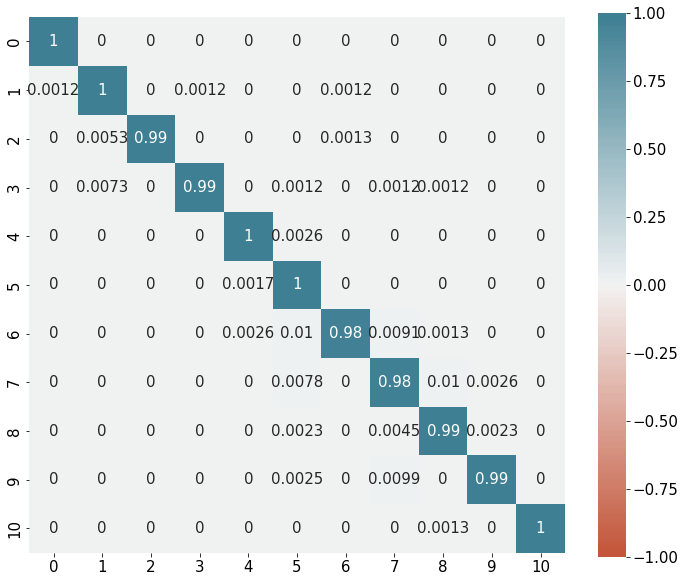

In [10]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.rcParams.update({'font.size': 15, 'figure.figsize': (10, 8)})
plt.figure(figsize=(12,10))
# Generate the heatmap
ax = sns.heatmap(confusion_matrix(pre_y, true_y,normalize='true'),
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 annot = True,
 #fmt="d"
                )